## Titanic project
## Our goal is to predict whether a passenger survived during shipwreck based on their age, occupation, rank etc.
### We want to use Decision trees and Random Forest algorithms to make predictions
### Outline to complete this project
(0) Import relevant libraries and import csv data using pandas library \
(1) Understand the shape/features of the data and visualize the trend using matplotlib (plots) \
(2) Data cleaning \
(3) Data exploration \
(4) Feature engineering \
(5) Data Preprocessing \
(6) Building models \
(7) Tunning model \
(8) Results and comparison

The description of the data set columns is here:
https://www.kaggle.com/competitions/titanic/data?select=train.csv

The Statistical model explored are: \
(1) LogisticRegression  \
(2) DecisionTree  \
(3) RandomForest \
(4) SupportVectorClassifier \
(5) xGBoost 

In [1]:
## Import relevant library and import data sets
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#load input data train.csv and test.csv using pandas data frame
train_pd = pd.read_csv("train.csv")
test_pd = pd.read_csv("test.csv")



In [2]:
## Get general info about the data such as different columns
print(train_pd.shape)
train_pd.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Notes 
### survival	is Survival	0 = No, 1 = Yes
### pclass: A proxy for socio-economic status (SES)
1st = Upper \
2nd = Middle \
3rd = Lower

### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

### sibsp: The dataset defines family relations in this way... 
It is number of siblings / spouses aboard the Titanic	\
Sibling = brother, sister, stepbrother, stepsister \
Spouse = husband, wife (mistresses and fiancés were ignored) 

### parch: The dataset defines family relations in this way...
It is number of parents / children aboard the Titanic \
Parent = mother, father \
Child = daughter, son, stepdaughter, stepson \
Some children travelled only with a nanny, therefore parch=0 for them 

### ticket	is Ticket number	
### fare	is Passenger fare	
### cabin	is Cabin number	
### embarked	is Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
#Check for null values
display( train_pd.isnull())
print(train_pd.dtypes)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
#Count null values in each column
display(train_pd.isnull().sum())
display(test_pd.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
#To better understand the central tendency of the numeric data, we can use the .describe() method. 
train_pd.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


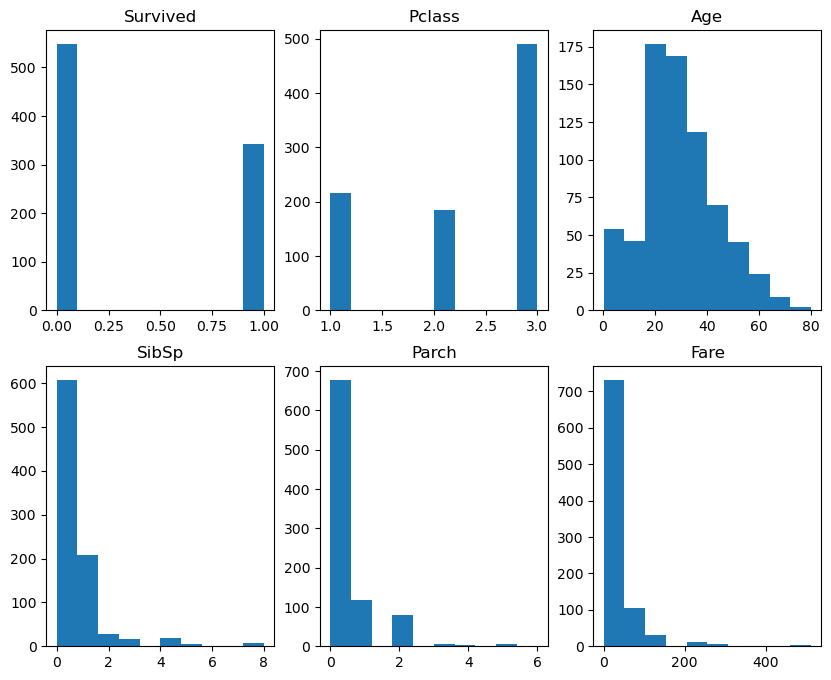

In [6]:
#Let's make 1D histogram of numeric data to see the overall distribution
# We use "hist" function for numeric data
# For categorical data, we should use "barplot" function defined in seaborn library
#print( train_pd.head())
fig, ax = plt.subplots(2,3,figsize=(10,8))
name = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
m=0
for i in range(0,2):
    for j in range(0,3):
        # ax[0].hist(train_pd['Age'])
        ax[i,j].hist(train_pd[name[m]])
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show() 

# (1) The data indicate that roughly 65% passenger survived
# (2) There are three classes of passenger: Number of passenger in class 1 and 2 are roughly same and are
# roughly half the number of passenger in class-3 (lower class)
# (3) The age distribution of passenger is roughly Gaussian centered around 30 years with deviation 10 years
# (4) The number of passengers with siblings onboard is mostly zero
# (5) The number of passengers with parents onboard is mostly zero
# (6) The fare is roughly peaked between 0-50 USD


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


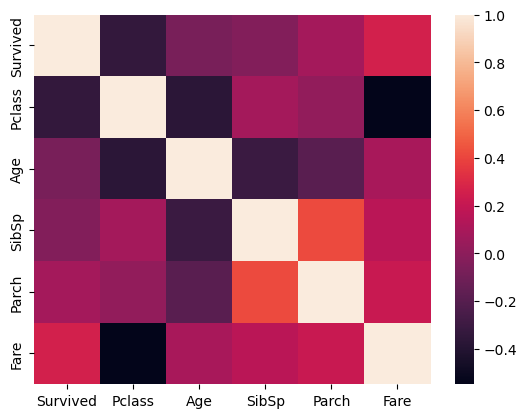

In [7]:
# To study the correlation between the two variables, we can compute
# the pearson coefficient using function "corr()" defined in pandaDataFrame.
# The pearson coefficient between two variable x and y is given as a ratio of sqrt(SD(x)) to sqrt(SD(y) time slope 
#.   of the linear fit to the data formed by x and y
# Pearson coefficient is proportional to the slope and measure the strength of linear correlation
# it varies from -1 to +1.
# We use seaborn library function "heatmap" to visualize 
PearsonDataMatrix = train_pd[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print(PearsonDataMatrix)
sb.heatmap(PearsonDataMatrix )
plt.show() 

male      577
female    314
Name: Sex, dtype: int64 

Index(['male', 'female'], dtype='object')


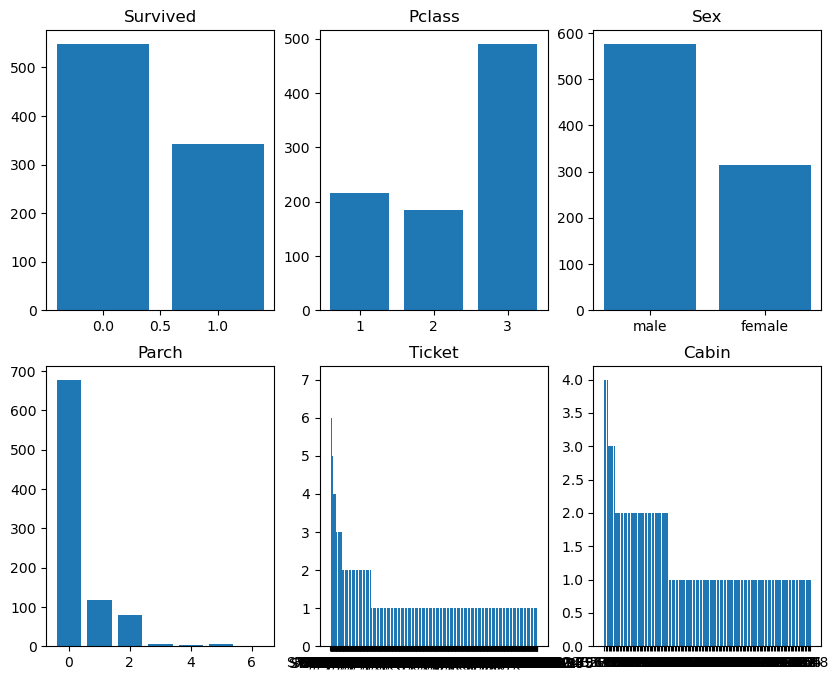

In [8]:
# Now, let's plot categorical data using matplotlib
print( train_pd['Sex'].value_counts() ,"\n")
print(train_pd['Sex'].value_counts().index )

#plt.bar(train_pd['Sex'].value_counts().index, train_pd['Sex'].value_counts())
fig, ax = plt.subplots(2,3,figsize=(10,8))
name = ['Survived', 'Pclass', 'Sex', 'Parch', 'Ticket', 'Cabin']
m=0
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].bar(train_pd[name[m]].value_counts().index, train_pd[name[m]].value_counts())
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show() 

male      577
female    314
Name: Sex, dtype: int64 

Index(['male', 'female'], dtype='object')


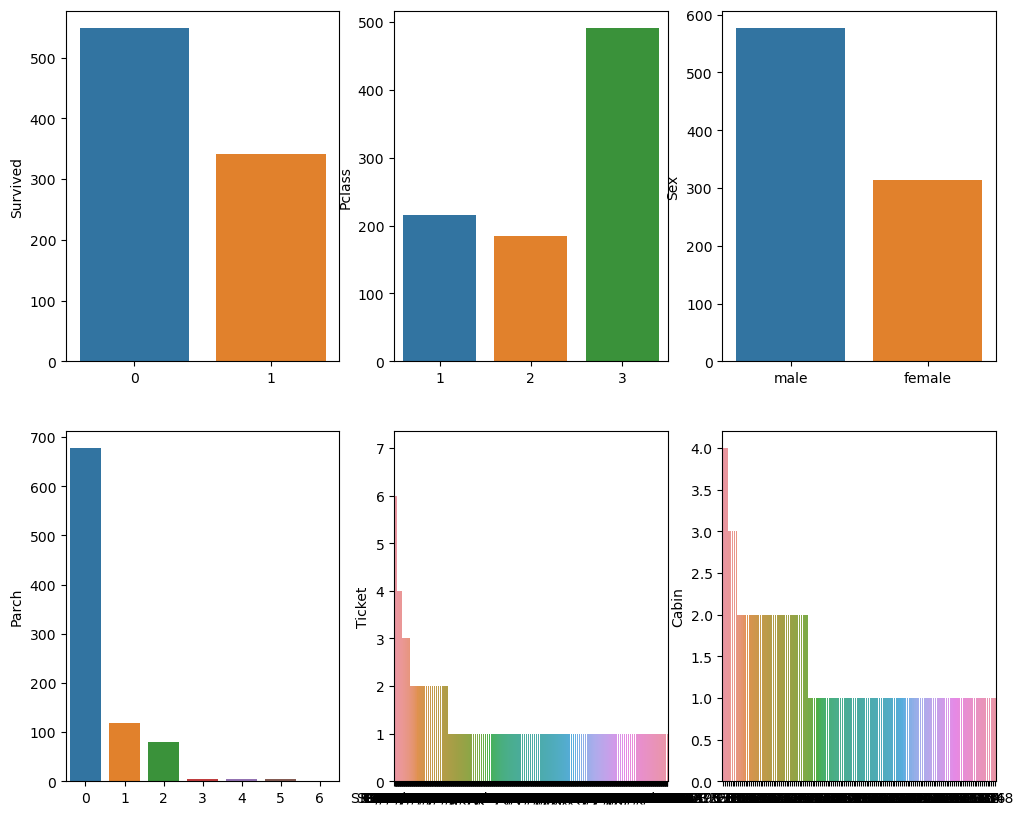

In [9]:
# Now, let's plot categorical data using seaborn library
print( train_pd['Sex'].value_counts() ,"\n")
print(train_pd['Sex'].value_counts().index )

#plt.bar(train_pd['Sex'].value_counts().index, train_pd['Sex'].value_counts())
fig, axs = plt.subplots(2,3,figsize=(12,10))
name = ['Survived', 'Pclass', 'Sex', 'Parch', 'Ticket', 'Cabin']
m=0

for i in range(0,2):
    for j in range(0,3):
        sb.barplot( x=train_pd[name[m]].value_counts().index, y=train_pd[name[m]].value_counts(), ax=axs[i,j])
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show()        

In [10]:
#Let's compare survival count for each of the categorical variables: Male/female, Passenger class, Embarked location
table_1 = pd.pivot_table(train_pd, values='Ticket', index='Survived', columns='Pclass', aggfunc='count')
table_2 = pd.pivot_table(train_pd, values='Ticket', index='Survived', columns='Sex', aggfunc='count')
table_3 = pd.pivot_table(train_pd, values='Ticket', index='Survived', columns='Embarked', aggfunc='count')

print(table_1,"\n")
print(table_2,"\n")
print(table_3,"\n")


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Sex       female  male
Survived              
0             81   468
1            233   109 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 



In [11]:
#Feature engineering of categorical variable
#Looking at Cabin column, we realize, some passengers have multiple cabins. Does this affect survival rate
# Let's count number of cabins for each passenger using ReGex (regular expression)
NumberOfCabin = train_pd['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')) )
#print(p.value_counts())
#for i in range(0,800):
#    print(train_pd['Cabin'].iloc[i], p[i], "\n")
print(NumberOfCabin.value_counts())

train_pd_new = train_pd    
train_pd_new['NumberOfCabin'] = NumberOfCabin
display(train_pd_new.head())

pd.pivot_table(train_pd_new, values='Ticket', index='Survived', columns='NumberOfCabin', aggfunc='count')

#same transformation on test data
NumberOfCabinTest = test_pd['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')) )
test_pd_new = test_pd
test_pd_new['NumberOfCabin'] = NumberOfCabinTest

0    687
1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumberOfCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
#Create a new column based on the cabin letter
train_pd_new['CabinLetter'] = train_pd_new['Cabin'].apply(lambda x: str(x)[0])
display(train_pd_new)


#Apply same transformation on test data
test_pd_new['CabinLetter'] = test_pd_new['Cabin'].apply(lambda x: str(x)[0])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumberOfCabin,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [13]:
#Feature engineering on person's title: Doctor, Major, Col, Mr, Miss, Mrs,
train_pd_new['name_title'] = train_pd_new['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip() )
display(train_pd_new)
print(train_pd_new['name_title'].value_counts())
pd.pivot_table(train_pd_new, values='Ticket', index='Survived', columns='name_title', aggfunc='count')

#Apply same transformation on test data
test_pd_new['name_title'] = test_pd_new['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip() )


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumberOfCabin,CabinLetter,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C,Mr


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64


In [14]:
#Remove the rows where Embarked column is null, as there are few instances, we can remove them from the data

train_pd_final = train_pd_new
train_pd_final.dropna(subset=['Embarked'], inplace=True) #Embarked
train_pd_final.reset_index(drop=True, inplace=True)
#print(train_pd_final.dtypes)
print( "\n", train_pd_final.isnull().sum())

display(train_pd_final)


#For age we can impute the null value with the mean values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(train_pd_final[['Age']])
train_pd_final['Age'] = imputer.transform(train_pd_final[['Age']])
print( '\n', train_pd_final.isnull().sum())

#Remove unwanted columns now
train_pd_final = train_pd_final.drop( columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
display(train_pd_final)
print( '\n', train_pd_final.isnull().sum())



#Apply the same transformation on test data as was applied on training data
test_pd_final = test_pd_new
test_pd_final.dropna(subset=['Embarked'], inplace=True) #Embarked
test_pd_final.reset_index(drop=True, inplace=True)

imputer2 = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer2.fit(test_pd_final[['Age']])
test_pd_final['Age'] = imputer2.transform(test_pd_final[['Age']])

imputer3 = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer3.fit(test_pd_final[['Fare']])
test_pd_final['Fare'] = imputer3.transform(test_pd_final[['Fare']])

test_pd_final = test_pd_final.drop( columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)



 PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
NumberOfCabin      0
CabinLetter        0
name_title         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumberOfCabin,CabinLetter,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n,Rev
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,Miss
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n,Miss
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C,Mr



 PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
NumberOfCabin      0
CabinLetter        0
name_title         0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumberOfCabin,CabinLetter,name_title
0,0,3,male,22.000000,1,0,7.2500,S,0,n,Mr
1,1,1,female,38.000000,1,0,71.2833,C,1,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,0,n,Miss
3,1,1,female,35.000000,1,0,53.1000,S,1,C,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,0,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S,0,n,Rev
885,1,1,female,19.000000,0,0,30.0000,S,1,B,Miss
886,0,3,female,29.642093,1,2,23.4500,S,0,n,Miss
887,1,1,male,26.000000,0,0,30.0000,C,1,C,Mr



 Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
NumberOfCabin    0
CabinLetter      0
name_title       0
dtype: int64


In [15]:
#Use OneHotEncoder method to encode the categorical data such as "Pclass", Sex", 'Embarked', 'SibSp', 'Parch', 
# 'NumberOfCabin', 'CabinLetter', 'name_title'
#(1) OneHotEncoder class (Independent variables) from sci-kit library

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

HotEncodedString =[]
for label in ["Pclass", "Sex",'SibSp', 'Parch', 'Embarked', 'NumberOfCabin', 'CabinLetter'] :    
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    ftarray =  ohe.fit_transform( train_pd_final[[label]] ) 
    testftarray =  ohe.transform( test_pd_final[[label]] ) 

    #print(ftarray)
    print(len(testftarray[0][:]))
    N=len(ftarray[0][:])
    print(N)
    stringlabel=[]
    for i in range(1,N+1):
        stringlabel.append( label+ str(i) )
    print(stringlabel)
    HotEncodedString = HotEncodedString + stringlabel
    ftPD = pd.DataFrame(ftarray, columns=stringlabel )
    
    testftPD = pd.DataFrame(testftarray, columns=stringlabel )

    #display(ftPD)
    train_pd_final = train_pd_final.join(ftPD)
    test_pd_final = test_pd_final.join(testftPD)

display(train_pd_final)
print( '\n', train_pd_final.isnull().sum())

display(test_pd_final)
print( '\n', test_pd_final.isnull().sum())


3
3
['Pclass1', 'Pclass2', 'Pclass3']
2
2
['Sex1', 'Sex2']
7
7
['SibSp1', 'SibSp2', 'SibSp3', 'SibSp4', 'SibSp5', 'SibSp6', 'SibSp7']
7
7
['Parch1', 'Parch2', 'Parch3', 'Parch4', 'Parch5', 'Parch6', 'Parch7']
3
3
['Embarked1', 'Embarked2', 'Embarked3']
5
5
['NumberOfCabin1', 'NumberOfCabin2', 'NumberOfCabin3', 'NumberOfCabin4', 'NumberOfCabin5']
9
9
['CabinLetter1', 'CabinLetter2', 'CabinLetter3', 'CabinLetter4', 'CabinLetter5', 'CabinLetter6', 'CabinLetter7', 'CabinLetter8', 'CabinLetter9']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumberOfCabin,CabinLetter,...,NumberOfCabin5,CabinLetter1,CabinLetter2,CabinLetter3,CabinLetter4,CabinLetter5,CabinLetter6,CabinLetter7,CabinLetter8,CabinLetter9
0,0,3,male,22.000000,1,0,7.2500,S,0,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,female,38.000000,1,0,71.2833,C,1,C,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,female,26.000000,0,0,7.9250,S,0,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,female,35.000000,1,0,53.1000,S,1,C,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,male,35.000000,0,0,8.0500,S,0,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S,0,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,1,1,female,19.000000,0,0,30.0000,S,1,B,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
886,0,3,female,29.642093,1,2,23.4500,S,0,n,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,male,26.000000,0,0,30.0000,C,1,C,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0



 Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
NumberOfCabin     0
CabinLetter       0
name_title        0
Pclass1           0
Pclass2           0
Pclass3           0
Sex1              0
Sex2              0
SibSp1            0
SibSp2            0
SibSp3            0
SibSp4            0
SibSp5            0
SibSp6            0
SibSp7            0
Parch1            0
Parch2            0
Parch3            0
Parch4            0
Parch5            0
Parch6            0
Parch7            0
Embarked1         0
Embarked2         0
Embarked3         0
NumberOfCabin1    0
NumberOfCabin2    0
NumberOfCabin3    0
NumberOfCabin4    0
NumberOfCabin5    0
CabinLetter1      0
CabinLetter2      0
CabinLetter3      0
CabinLetter4      0
CabinLetter5      0
CabinLetter6      0
CabinLetter7      0
CabinLetter8      0
CabinLetter9      0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumberOfCabin,CabinLetter,name_title,...,NumberOfCabin5,CabinLetter1,CabinLetter2,CabinLetter3,CabinLetter4,CabinLetter5,CabinLetter6,CabinLetter7,CabinLetter8,CabinLetter9
0,3,male,34.50000,0,0,7.8292,Q,0,n,Mr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,female,47.00000,1,0,7.0000,S,0,n,Mrs,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,62.00000,0,0,9.6875,Q,0,n,Mr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,male,27.00000,0,0,8.6625,S,0,n,Mr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,female,22.00000,1,1,12.2875,S,0,n,Mrs,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,0,n,Mr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1,female,39.00000,0,0,108.9000,C,1,C,Dona,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,3,male,38.50000,0,0,7.2500,S,0,n,Mr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,3,male,30.27259,0,0,8.0500,S,0,n,Mr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



 Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
NumberOfCabin     0
CabinLetter       0
name_title        0
Pclass1           0
Pclass2           0
Pclass3           0
Sex1              0
Sex2              0
SibSp1            0
SibSp2            0
SibSp3            0
SibSp4            0
SibSp5            0
SibSp6            0
SibSp7            0
Parch1            0
Parch2            0
Parch3            0
Parch4            0
Parch5            0
Parch6            0
Parch7            0
Embarked1         0
Embarked2         0
Embarked3         0
NumberOfCabin1    0
NumberOfCabin2    0
NumberOfCabin3    0
NumberOfCabin4    0
NumberOfCabin5    0
CabinLetter1      0
CabinLetter2      0
CabinLetter3      0
CabinLetter4      0
CabinLetter5      0
CabinLetter6      0
CabinLetter7      0
CabinLetter8      0
CabinLetter9      0
dtype: int64


In [16]:
#Create training and test data set by converting pandas data frame into numpy arrary
#Training data set X_train, y_train
#Test data set X_test, y_test
X_train = np.asarray( train_pd_final[ ['Age', 'Fare'] + HotEncodedString])
y_train = np.asarray( train_pd_final['Survived'])

#display(X_train)
#display(y_train[0:10])


#since, y_test is not given, we only make predictions for X_test
#The performance of the model would be assesed based on the training data itself

X_test = np.asarray( test_pd_final[ ['Age', 'Fare'] + HotEncodedString])
print( test_pd_final[ ['Age', 'Fare'] + HotEncodedString].isnull().sum() )
display(X_test)


Age               0
Fare              0
Pclass1           0
Pclass2           0
Pclass3           0
Sex1              0
Sex2              0
SibSp1            0
SibSp2            0
SibSp3            0
SibSp4            0
SibSp5            0
SibSp6            0
SibSp7            0
Parch1            0
Parch2            0
Parch3            0
Parch4            0
Parch5            0
Parch6            0
Parch7            0
Embarked1         0
Embarked2         0
Embarked3         0
NumberOfCabin1    0
NumberOfCabin2    0
NumberOfCabin3    0
NumberOfCabin4    0
NumberOfCabin5    0
CabinLetter1      0
CabinLetter2      0
CabinLetter3      0
CabinLetter4      0
CabinLetter5      0
CabinLetter6      0
CabinLetter7      0
CabinLetter8      0
CabinLetter9      0
dtype: int64


array([[34.5       ,  7.8292    ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [47.        ,  7.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [62.        ,  9.6875    ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [38.5       ,  7.25      ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [30.27259036,  8.05      ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [30.27259036, 22.3583    ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

### Model for classification
(1) Logistic Regression \
(2) Decision Tree \
(3) Random Forest \
(4) Support Vector Classifier \
(5) Xtreme Gradient Boosting (xGBoost)


In [17]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
'''
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
#We will use grid search cross validation function 


In [18]:
#define a function to plot 2x2 confusion matrix
def plot_confusion_matrix(cnf_mat, LabelS, cmap=plt.cm.Blues): 
    fig, ax = plt.subplots(1, 1)
    ims = ax.imshow(cnf_mat, interpolation='nearest', cmap=cmap)
    plt.colorbar(ims, ax=ax)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(LabelS))
    plt.xticks(tick_marks, LabelS, rotation=45)
    plt.yticks(tick_marks, LabelS)
    for i  in range(0,2):
        for j in range(0,2):
            plt.text(i,j,cnf_mat[i][j])

#Retrive classification report and consfusion matrix
from sklearn.metrics import classification_report, confusion_matrix
def EvaluateModel(y_test, y_predict):
    print( classification_report(y_test, y_predict) )
    cnf_mat = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(cnf_mat)
    plot_confusion_matrix(cnf_mat, LabelS=['Not Survived(0)','Survived(1)'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression 
 BestScore:  0.8087919761315305 
 Best parameters:  {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.80      0.71      0.75       340

    accuracy                           0.82       889
   macro avg       0.82      0.80      0.80       889
weighted avg       0.82      0.82      0.82       889

[[489  60]
 [100 240]]


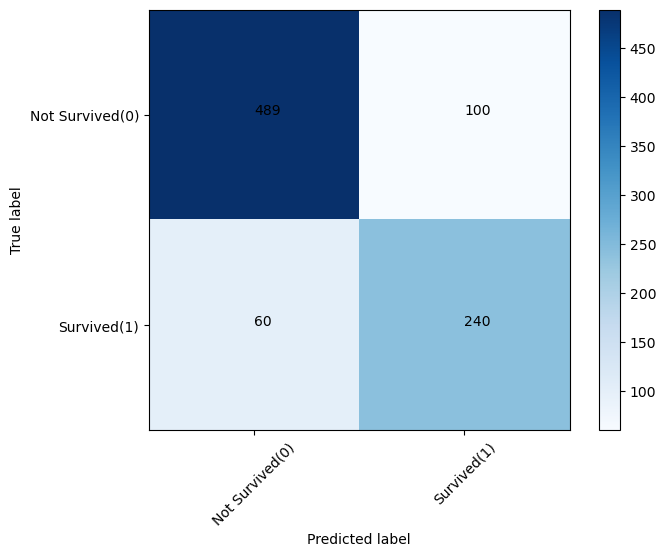

In [19]:
#Use logistic regression model to the data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
lr_model = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_lr = lr_model.fit(X_train, y_train)
print('Logistic Regression', "\n", 
                "BestScore: ", best_lr.best_score_, '\n',
                 "Best parameters: ", best_lr.best_params_ )


#Print confusion matrix
y_predict_lr = lr_model.predict(X_train)
EvaluateModel(y_train, y_predict_lr) 

#Model predictions
y_test_predict_lr = lr_model.predict(X_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
DecisionTreeClassifier 
 BestScore:  0.8121691106455913 
 Best parameters:  {'criterion': 'entropy', 'max_depth': 4}
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.83      0.72      0.77       340

    accuracy                           0.84       889
   macro avg       0.84      0.81      0.82       889
weighted avg       0.84      0.84      0.83       889

[[499  50]
 [ 95 245]]


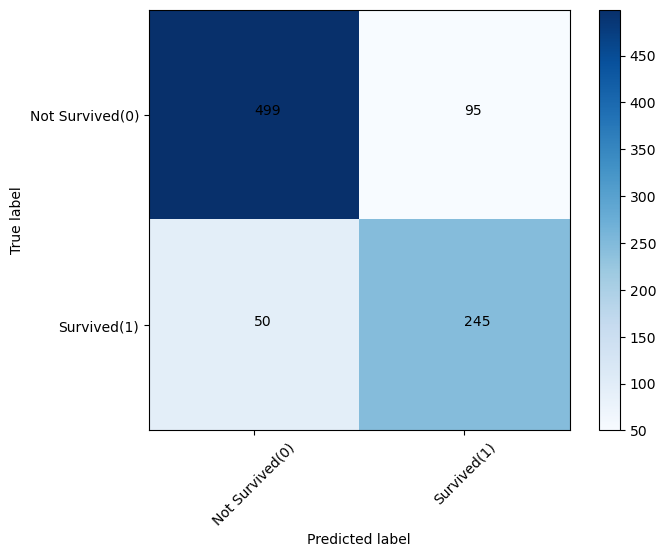

In [20]:
#Using  DecisionTree Classifier to model the data
from sklearn import tree
dct = tree.DecisionTreeClassifier()
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dct_model = GridSearchCV(dct, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_dct = dct_model.fit(X_train, y_train)
print('DecisionTreeClassifier', "\n", 
                "BestScore: ", best_dct.best_score_, '\n',
                 "Best parameters: ", best_dct.best_params_ )


#Print confusion matrix
y_predict_dct = dct_model.predict(X_train)
EvaluateModel(y_train, y_predict_dct) 

#Model predictions
y_test_predict_dct = dct_model.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
RandomForestClassifier 
 BestScore:  0.8166888846568907 
 Best parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       549
           1       0.93      0.81      0.87       340

    accuracy                           0.90       889
   macro avg       0.91      0.89      0.90       889
weighted avg       0.91      0.90      0.90       889

[[527  22]
 [ 63 277]]


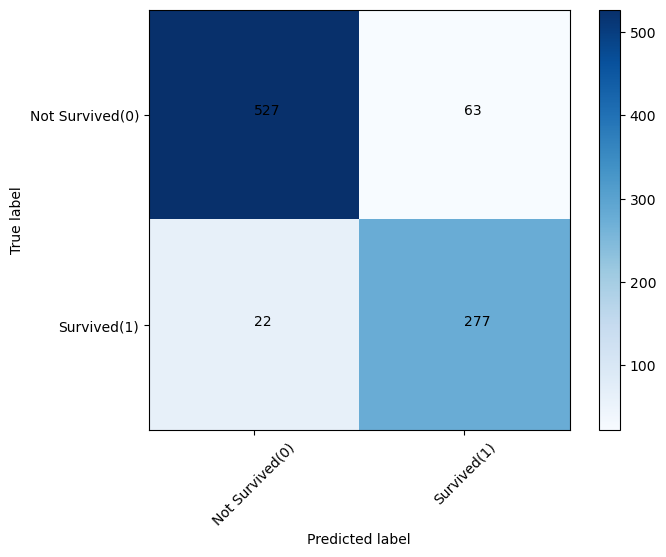

In [21]:
#Using  RandomForest  Classifier to model the data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
param_grid = {  'n_estimators': [200, 400],
                'criterion':['gini','entropy'],
                'bootstrap': [True],
                'max_depth': [15],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [2],
                'min_samples_split': [2]}
rfc_model = GridSearchCV(rfc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rfc = rfc_model.fit(X_train, y_train)
print('RandomForestClassifier', "\n", 
                "BestScore: ", best_rfc.best_score_, '\n',
                 "Best parameters: ", best_rfc.best_params_ )


#Print confusion matrix
y_predict_rfc = rfc_model.predict(X_train)
EvaluateModel(y_train, y_predict_rfc) 

#Model predictions
y_test_predict_rfc = rfc_model.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
SupportVectorClassifier 
 BestScore:  0.7953215260585285 
 Best parameters:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       549
           1       0.83      0.83      0.83       340

    accuracy                           0.87       889
   macro avg       0.87      0.87      0.87       889
weighted avg       0.87      0.87      0.87       889

[[493  56]
 [ 57 283]]


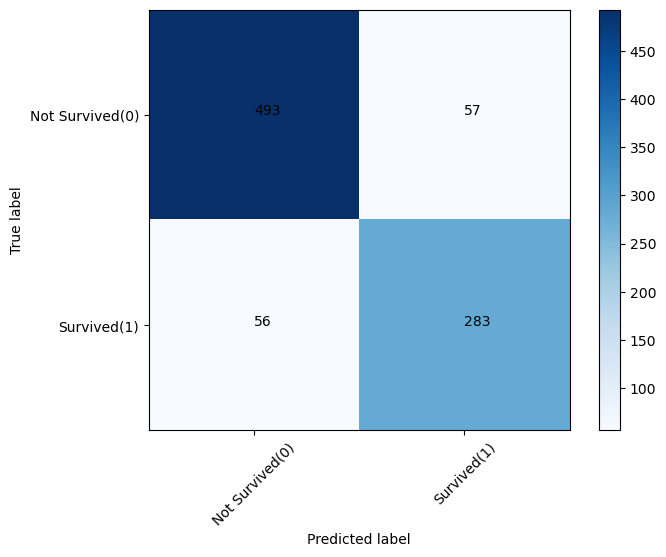

In [22]:
#Using  Support vector  Classifier to model the data
from sklearn.svm import SVC

svc = SVC(random_state=0)
param_grid = {  'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf'] }
svc_model = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True)
best_svc = svc_model.fit(X_train, y_train)
print('SupportVectorClassifier', "\n", 
                "BestScore: ", best_svc.best_score_, '\n',
                 "Best parameters: ", best_svc.best_params_ )


#Print confusion matrix
y_predict_svc = svc_model.predict(X_train)
EvaluateModel(y_train, y_predict_svc) 

#Model predictions
y_test_predict_svc = svc_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
xGBoost Classifier 
 BestScore:  0.8268012442074525 
 Best parameters:  {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       549
           1       0.96      0.88      0.92       340

    accuracy                           0.94       889
   macro avg       0.95      0.93      0.94       889
weighted avg       0.94      0.94      0.94       889

[[537  12]
 [ 41 299]]


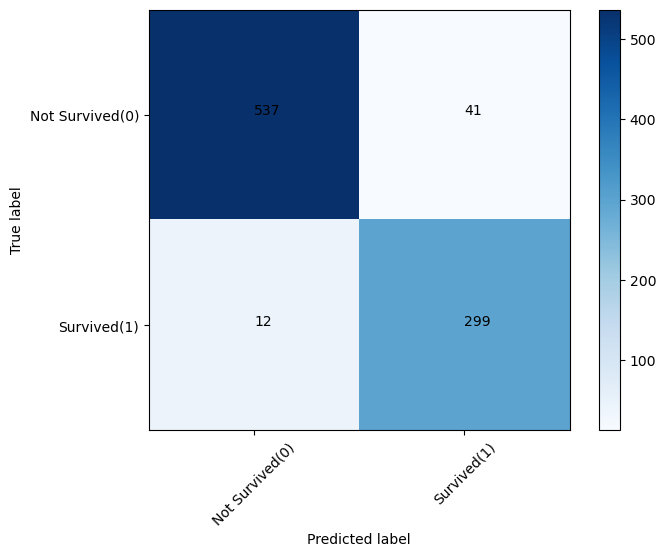

In [23]:
#Using  xGBoost (ExtremeGradientBoost)  Classifier to model the data
import xgboost as xgb

xgbc = xgb.XGBClassifier(random_state=0)
param_grid = {'gamma': [0,0.1, 200],
              'learning_rate': [0.01,  0.3],
              'max_depth': [5],
              'n_estimators': [50],
              'reg_alpha': [0,0.1],
              'reg_lambda': [0,0.1]}
xgbc_model = GridSearchCV(xgbc, param_grid = param_grid, cv = 5, verbose = True)
best_xgbc = xgbc_model.fit(X_train, y_train)
print('xGBoost Classifier', "\n", 
                "BestScore: ", best_xgbc.best_score_, '\n',
                 "Best parameters: ", best_xgbc.best_params_ )


#Print confusion matrix
y_predict_xgbc = xgbc_model.predict(X_train)
EvaluateModel(y_train, y_predict_xgbc) 

#Model predictions
y_test_predict_xgbc = xgbc_model.predict(X_test)

Accuracy of statistical models considered:

LogisticRegression = 82% \
DecisionTree = 89% \
RandomForest = 90% \
SupportVectorClassifier = 87% \
xGBoost = 94%

## For the given parameter exploration, xGBoost performs with highest accuracy ~95%
